Jeu de données issue de la station1

# Importation de library

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from fbprophet import Prophet

In [9]:
avg_station = pd.read_csv("c:\\Users\\HP\\Desktop\\station.avg_stat_hour2.csv", sep=",")
df = avg_station.copy()


In [10]:
df.head()

,_id,moyCO,moyPM25,timestamp
0,657570ce4f68e5517d812b85,-0.205390,9.526344,2023-08-14
1,657570ce4f68e5517d812b86,-0.399079,8.310671,2023-12-01
2,657570ce4f68e5517d812b87,0.483929,6.300806,2022-12-13
3,657570ce4f68e5517d812b88,0.152275,6.680708,2023-02-04
4,657570ce4f68e5517d812b89,-0.267580,4.481138,2023-05-23


# statistique descriptive 

In [11]:
df.info()
df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _id        349 non-null    object 
 1   moyCO      349 non-null    float64
 2   moyPM25    349 non-null    float64
 3   timestamp  349 non-null    object 
dtypes: float64(2), object(2)
memory usage: 11.0+ KB


0

# Visualisation de la distribution des données 

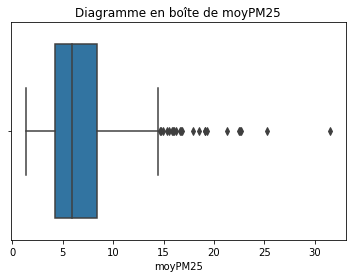

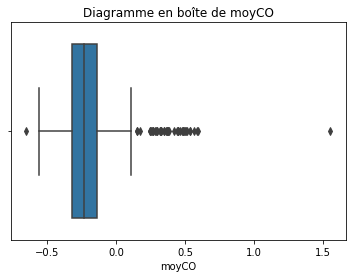

In [12]:

# Diagramme en boîte de la colonne 'moyPM25'
sns.boxplot(x=avg_station['moyPM25'])
plt.title('Diagramme en boîte de moyPM25')
plt.show()

# Diagramme en boîte de la colonne 'moyCO'
sns.boxplot(x=avg_station['moyCO'])
plt.title('Diagramme en boîte de moyCO')
plt.show()

On constate la présence des valeurs aberrantes pour chacune des deux variables moyCO et moyPM25.

# Serie temporelle, visualisons les données en fonction du temps

In [13]:
print(df["timestamp"].min())
print(df["timestamp"].max())

date_debut = '2022-12-10'
date_fin = '2023-01-10'

2022-12-10
2023-12-10


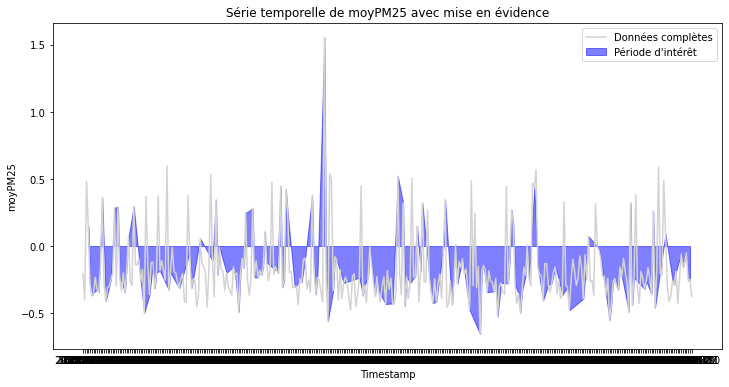

In [14]:
# Filtrer les données pour une plage de dates spécifique
date_debut = '2023-01-01'
date_fin = '2023-06-30'
df_new = df[(df['timestamp'] >= date_debut) & (df['timestamp'] <= date_fin)]

plt.figure(figsize=(12, 6))

# Tracer la série temporelle complète
plt.plot(df['timestamp'], df['moyCO'], linestyle='-', color='lightgrey', label='Données complètes')

# Tracer la période d'intérêt en surbrillance
plt.fill_between(df_new['timestamp'], df_new['moyCO'], color='blue', alpha=0.5, label='Période d\'intérêt')

plt.title('Série temporelle de moyPM25 avec mise en évidence')
plt.xlabel('Timestamp')
plt.ylabel('moyPM25')
plt.legend()
plt.show()

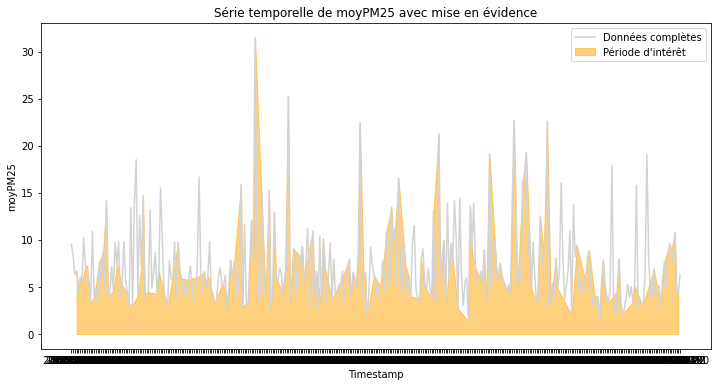

In [15]:
# Filtrer les données pour une plage de dates spécifique
date_debut = '2023-01-01'
date_fin = '2023-06-30'
df_new = df[(df['timestamp'] >= date_debut) & (df['timestamp'] <= date_fin)]

plt.figure(figsize=(12, 6))

# Tracer la série temporelle complète
plt.plot(df['timestamp'], df['moyPM25'], linestyle='-', color='lightgrey', label='Données complètes')

# Tracer la période d'intérêt en surbrillance
plt.fill_between(df_new['timestamp'], df_new['moyPM25'], color='orange', alpha=0.5, label='Période d\'intérêt')

plt.title('Série temporelle de moyPM25 avec mise en évidence')
plt.xlabel('Timestamp')
plt.ylabel('moyPM25')
plt.legend()
plt.show()

nous utilisons le modèle de lissage exponentiel de statsmodels. Vous pouvez ajuster les paramètres du modèle en fonction de votre série temporelle spécifique

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Charger votre DataFrame "df"
# Assurez-vous que la colonne 'timestamp' est au format datetime et 'moyPM25' est au format numérique
# Utilisez pd.to_datetime() et pd.to_numeric() au besoin
# Exemple:
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['moyPM25'] = pd.to_numeric(df['moyPM25'])

# Préparation des données pour Statsmodels
time_series = df[['timestamp', 'moyPM25']].rename(columns={'timestamp': 'ds', 'moyPM25': 'y'})
time_series.set_index('ds', inplace=True)

# Ajustement du modèle de lissage exponentiel
model = ExponentialSmoothing(time_series, trend='add', seasonal='add', seasonal_periods=24)  # Saisonnalité quotidienne
fit_model = model.fit()

# Prévisions pour les deux prochaines heures
forecast = fit_model.forecast(steps=2)

# Affichage du graphique de la prévision
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series['y'], label='Données historiques')
plt.plot(forecast.index, forecast, label='Prévisions')
plt.title('Prévisions des deux prochaines heures pour moyPM25')
plt.xlabel('Timestamp')
plt.ylabel('moyPM25')
plt.legend()
plt.show()
